In [1]:
#========================= IMPORT PACKAGES ===========================
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics

In [2]:
#==================== DATA SELECTION =========================

print("-----------------------------------------")
print("============ Data Selection =============")
print("-----------------------------------------")
data=pd.read_csv("Dataset.csv")
print(data.head(10))
print()

-----------------------------------------
============ Data Selection =============
-----------------------------------------
   Unnamed: 0                                    Date  \
0           0     Reviewed in India on 10 August 2018   
1           1      Reviewed in India on 27 March 2018   
2           2   Reviewed in India on 19 December 2018   
3           3       Reviewed in India on 25 June 2020   
4           4    Reviewed in India on 27 October 2018   
5           5  Reviewed in India on 11 September 2020   
6           6    Reviewed in India on 9 December 2018   
7           7         Reviewed in India on 9 May 2019   
8           8  Reviewed in India on 22 September 2020   
9           9   Reviewed in India on 14 November 2018   

                                                 URL  \
0  https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
1  https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
2  https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
3  https://www.amazon.

In [3]:
#================== PREPROCESSING =============================

#=== checking missing values ===

print("-----------------------------------------")
print("========= Checking missing values  ======")
print("-----------------------------------------")
print(data.isnull().sum())
print()

data.drop_duplicates(inplace = True)

#=== drop unwanted columns ===

print("----------------------------------------------")
print("============= Drop unwanted columns  =========")
print("----------------------------------------------")
print()
print("1.Before drop unwanted columns :",data.shape)
print()
print()
data_1=data.drop(['Unnamed: 0','Date'], axis = 1)
print("2.After drop unwanted columns  :",data_1.shape)
print()
print()


-----------------------------------------
========= Checking missing values  ======
-----------------------------------------
Unnamed: 0        0
Date              0
URL               0
Review_Title      0
Author            0
Rating            0
Review_text       0
Review_helpful    0
Sentiment         0
Subjectivity      0
Neg_Count         0
Word_Count        0
Unique_words      0
Noun_Count        0
Adj_Count         0
Verb_Count        0
Adv_Count         0
Pro_Count         0
Pre_Count         0
Con_Count         0
Art_Count         0
Nega_Count        0
Aux_Count         0
Authenticity      0
AT                0
Rev_Type          0
dtype: int64

----------------------------------------------
============= Drop unwanted columns  =========
----------------------------------------------

1.Before drop unwanted columns : (9438, 26)


2.After drop unwanted columns  : (9438, 24)




In [4]:
#========================= NLP TECHNIQUES ============================

#=== TEXT CLEANING ==== 

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    return sentence


print("----------------------------------------------")
print("============ Before Applying NLP  ============")
print("----------------------------------------------")
print()
print(data['Review_text'].head(10))

print("----------------------------------------------")
print("============ After Applying NLP  =============")
print("----------------------------------------------")
print()

data_1["Summary_Clean"] = data_1["Review_text"].apply(cleanup) 
data_1["URL"] = data_1["URL"].apply(cleanup) 

print(data_1["Summary_Clean"].head(10))


----------------------------------------------
============ Before Applying NLP  ============
----------------------------------------------

0      A really awesome keyboard  i was actually go...
1      I know its costly but its worth your money  ...
2      I had been contemplating to buy this for a l...
3      SO   Very very small keys  For fast typers w...
4      Good to use keyboard while it is new  but it...
5      Have always used a Logitech as my keyboard f...
6      The short review  The Logitech G     membran...
7      Pros  cheaper than most other high end keybo...
8      This is a terrible product by Logitech  I am...
9      Pros    Dedicated media keys and Windows tog...
Name: Review_text, dtype: object
----------------------------------------------
============ After Applying NLP  =============
----------------------------------------------

0      a really awesome keyboard  i was actually go...
1      i know its costly but its worth your money  ...
2      i had been conte

In [5]:
#========================= SENTIMENT ANALYSIS ==========================

#=== POS, NEG, NEUTRAL ===

analyzer = SentimentIntensityAnalyzer()
data_1['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data_1['Summary_Clean']]
data_1['neg'] = [analyzer.polarity_scores(x)['neg'] for x in data_1['Summary_Clean']]
data_1['neu'] = [analyzer.polarity_scores(x)['neu'] for x in data_1['Summary_Clean']]
data_1['pos'] = [analyzer.polarity_scores(x)['pos'] for x in data_1['Summary_Clean']]


In [6]:
#======================= DATA SPLITTING ===========================

X = data_1["Summary_Clean"]
y = data_1['Rev_Type']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's : ", data_1.shape[0])
print()
print("Total No.of training data's : ", X_train.shape[0])
print()
print("Total No.of testing data's : ", X_test.shape[0])


---------------- Data Splitting --------------

Total No.of data's :  9438

Total No.of training data's :  7550

Total No.of testing data's :  1888


In [7]:
#================= VECTORIZATION ================================

vector = CountVectorizer(stop_words = 'english', lowercase = True)

#fitting the data
training_data = vector.fit_transform(X_train)

#tranform the test data
testing_data = vector.transform(X_test)   

print("==============================================")
print("---------------- Vectorization --------------")
print("==============================================")
print()
print(training_data)


---------------- Vectorization --------------

  (0, 594)	1
  (0, 5874)	1
  (0, 4476)	1
  (0, 4295)	1
  (0, 735)	1
  (1, 7078)	1
  (1, 2785)	1
  (2, 735)	1
  (2, 6646)	1
  (2, 5498)	1
  (2, 2399)	1
  (2, 1025)	1
  (2, 2010)	1
  (2, 551)	1
  (2, 5506)	1
  (2, 6261)	1
  (3, 5874)	1
  (3, 3200)	1
  (3, 6398)	1
  (3, 3010)	1
  (3, 669)	1
  (3, 5806)	1
  (3, 2727)	1
  (4, 5806)	1
  (4, 2727)	1
  :	:
  (7548, 3322)	3
  (7548, 7710)	1
  (7548, 3550)	1
  (7548, 7144)	2
  (7548, 2479)	1
  (7548, 4061)	1
  (7548, 6478)	1
  (7548, 3602)	1
  (7548, 2492)	1
  (7548, 6171)	1
  (7548, 2477)	1
  (7548, 4566)	1
  (7548, 6225)	1
  (7548, 2873)	1
  (7548, 6761)	1
  (7548, 6180)	1
  (7548, 1478)	1
  (7548, 7726)	1
  (7549, 2785)	1
  (7549, 3322)	2
  (7549, 4181)	1
  (7549, 8025)	1
  (7549, 3233)	2
  (7549, 775)	1
  (7549, 2679)	1


------------------- AdaBoost -----------------

============ Performance Analysis =========

 Accuracy : 80.8792372881356 %

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1279
           1       0.58      0.80      0.67       609

    accuracy                           0.75      1888
   macro avg       0.73      0.76      0.73      1888
weighted avg       0.79      0.75      0.75      1888




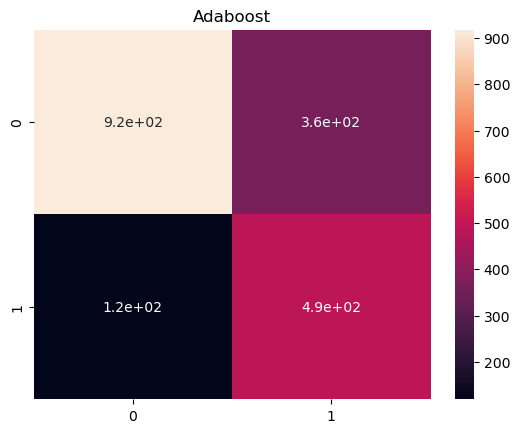

In [8]:
#========================== CLASSIFICATION =================================

from sklearn.ensemble import AdaBoostClassifier


print("==============================================")
print("------------------- AdaBoost -----------------")
print("==============================================")
print()

#=== initialize the model ===
ada_boost = AdaBoostClassifier()

#=== fitting the model ===
ada_boost = ada_boost.fit(training_data, y_train)

#=== predict the model ===
y_pred_ada = ada_boost.predict(testing_data)

#=== PERFORMANCE ANALYSIS ===

cm=metrics.confusion_matrix(y_pred_ada,y_test)

TP=cm[0][0]
TN=cm[0][1]
FP=cm[1][0]
FN=cm[1][1]

Total=TP+TN+FP+FN

Acc_lr=(TP+FN+FP)/Total

print("============ Performance Analysis =========")
print()
print(" Accuracy :",Acc_lr*100,'%')
print()
print(metrics.classification_report(y_pred_ada,y_test))
print()


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.title("Adaboost")
plt.show()


------------------- LOGISTIC REGRESSION -----------------



C:\ProgramData\Anaconda\envs\EGC\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


============ Performance Analysis =========

 Accuracy : 93.22033898305084 %

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1025
           1       0.85      0.84      0.84       863

    accuracy                           0.86      1888
   macro avg       0.86      0.86      0.86      1888
weighted avg       0.86      0.86      0.86      1888




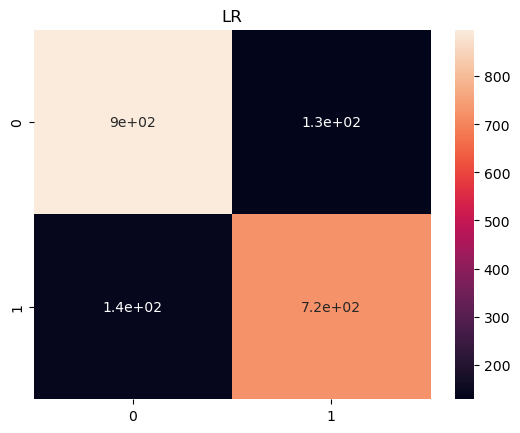

In [9]:
# =========== LR ===

from sklearn import linear_model


print("==============================================")
print("------------------- LOGISTIC REGRESSION -----------------")
print("==============================================")
print()

#=== initialize the model ===
lr= linear_model.LogisticRegression()

#=== fitting the model ===
lr = lr.fit(training_data, y_train)

#=== predict the model ===
y_pred_ada = lr.predict(testing_data)

#=== PERFORMANCE ANALYSIS ===

cm=metrics.confusion_matrix(y_pred_ada,y_test)

TP=cm[0][0]
TN=cm[0][1]
FP=cm[1][0]
FN=cm[1][1]

Total=TP+TN+FP+FN

Acc=(TP+FN+FP)/Total

print("============ Performance Analysis =========")
print()
print(" Accuracy :",Acc*100,'%')
print()
print(metrics.classification_report(y_pred_ada,y_test))
print()


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.title("LR")
plt.show()


In [ ]:
# input ====

inputtext=str(input("Enter Review = "))

testing_data = vector.transform([inputtext])   

y_pred_ada1 = lr.predict(testing_data)

if y_pred_ada1 ==0:
    print(" The review is fake ")

else:
    print("==========================")
    print()
    print(" The review is real ")
    

In [ ]:
#========================== PREDICTION =================================

for i in range(0,10):
    if y_pred_ada[i]==0:
        print("==========================")
        print()
        print(" The review is fake ")
    else:
        print("==========================")
        print()
        print(" The review is real ")

        
        

a=4

data_label=data_1['Rev_Type']


x1=data_label
for i in range(0,len(data_1)):
    if x1[i]==a:
        idx=2  
    
    
data_frame1_c=data_1['Author']

Req_data_c=data_frame1_c[1]

print("Identified user = ",Req_data_c )


In [ ]:
#========================== VISUALIZATION ==============================

#pie graph

plt.figure(figsize = (5,5))
counts =data_1['Rev_Type'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},autopct='%1.1f%%', pctdistance = 0.55, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Reviews: {}'.format(data_1.shape[0]))
plt.title('Total No.of reviews', fontsize = 14);
plt.show()

# ===== Graphs =========

import matplotlib.pyplot as plt 

import seaborn as sns
sns.scatterplot(x=data_1['Rating'], y=data_1['neg'], hue=data_1['Rev_Type'])
plt.title("Scatter Plot")
plt.show()



#---

sns.barplot(y=[Acc_lr,Acc],x=['Adaboost','LR'])
plt.title("Comparison")
plt.show()

# ---

import matplotlib.pyplot as plt
plt.hist(y)
plt.show() 


# ---- 

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(data_1[["Rating", "neg", "Rev_Type"]].corr(), annot = True)
plt.show()
